In [1]:
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt

from models import Unet
from datasets import ISBI2012Dataset
from trainers import Trainer

import warnings
warnings.filterwarnings("ignore")

In [2]:
transform = transforms.Compose([transforms.ToTensor()])


In [3]:
isbi = ISBI2012Dataset('./dataset/train-volume.tif', './dataset/train-labels.tif',
                       transforms=transform)

In [4]:
isbi.train.shape

(30, 512, 512, 1)

In [5]:
isbi.targets.shape

(30, 512, 512, 1)

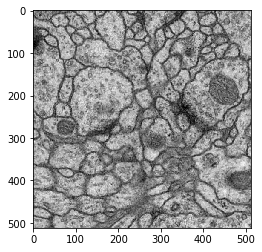

In [6]:
plt.imshow(isbi.train[0].reshape(512, 512), cmap='gray');

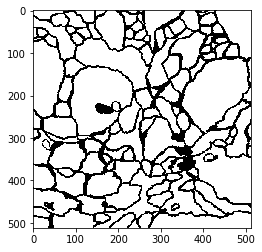

In [7]:
plt.imshow(isbi.targets[0].reshape(512, 512) , cmap='gray');

In [8]:
unet = Unet()
unet.cuda();

In [9]:
trainer = Trainer(unet)

In [10]:
criterion = nn.BCEWithLogitsLoss()

In [11]:
optimizer = optim.Adam(trainer.model.parameters(), lr=1e-3)
loss_history = trainer.fit_generator(isbi, criterion, optimizer, 25);

Epoch : 1/25
----------
	Batch : 10/30	Loss : 0.5143
	Batch : 20/30	Loss : 0.4694
	Batch : 30/30	Loss : 0.4955
Epoch : 2/25
----------
	Batch : 10/30	Loss : 0.4048
	Batch : 20/30	Loss : 0.3647
	Batch : 30/30	Loss : 0.4182
Epoch : 3/25
----------
	Batch : 10/30	Loss : 0.3454
	Batch : 20/30	Loss : 0.3030
	Batch : 30/30	Loss : 0.3490
Epoch : 4/25
----------
	Batch : 10/30	Loss : 0.2771
	Batch : 20/30	Loss : 0.2430
	Batch : 30/30	Loss : 0.2965
Epoch : 5/25
----------
	Batch : 10/30	Loss : 0.2389
	Batch : 20/30	Loss : 0.2108
	Batch : 30/30	Loss : 0.2644
Epoch : 6/25
----------
	Batch : 10/30	Loss : 0.2185
	Batch : 20/30	Loss : 0.1903
	Batch : 30/30	Loss : 0.2420
Epoch : 7/25
----------
	Batch : 10/30	Loss : 0.2062
	Batch : 20/30	Loss : 0.1875
	Batch : 30/30	Loss : 0.2299
Epoch : 8/25
----------
	Batch : 10/30	Loss : 0.1974
	Batch : 20/30	Loss : 0.1718
	Batch : 30/30	Loss : 0.2176
Epoch : 9/25
----------
	Batch : 10/30	Loss : 0.1943
	Batch : 20/30	Loss : 0.1657
	Batch : 30/30	Loss : 0.2145
E

In [12]:
loss_history

[0.5167833149433136,
 0.39762793978055316,
 0.32926951547463734,
 0.27692073384920757,
 0.24073605388402938,
 0.21941585689783097,
 0.20933237771193186,
 0.19673922657966614,
 0.19019000232219696,
 0.18422310650348664,
 0.18268842945496241,
 0.17729924072821934,
 0.17263894031445184,
 0.16892919689416885,
 0.16896582990884781,
 0.1652137190103531,
 0.15924788564443587,
 0.15855370412270228,
 0.1557631567120552,
 0.15415163040161134,
 0.14918788025776544,
 0.14487567370136578,
 0.13998734454313913,
 0.13648098583022752,
 0.1331962672372659]

In [13]:
img, target = isbi[0]
y_pred = trainer.predict(img)

In [14]:
y_pred

array([[[[0.9422114 , 0.9739217 , 0.97566175, ..., 0.9866894 ,
          0.9808672 , 0.95029336],
         [0.97357464, 0.98617715, 0.983955  , ..., 0.99237436,
          0.98980355, 0.97797376],
         [0.9801584 , 0.98977554, 0.98869634, ..., 0.9972115 ,
          0.99576926, 0.98718077],
         ...,
         [0.99216545, 0.9941294 , 0.99538225, ..., 0.9954235 ,
          0.99290484, 0.97986126],
         [0.98344165, 0.9873767 , 0.9916558 , ..., 0.9960161 ,
          0.99274445, 0.9793697 ],
         [0.9485897 , 0.9711031 , 0.9802705 , ..., 0.9919119 ,
          0.98593616, 0.94932795]]]], dtype=float32)

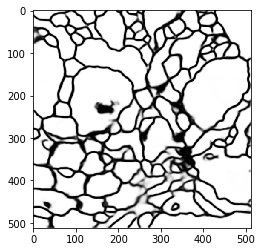

In [15]:
plt.imshow(y_pred.reshape(512, 512), cmap='gray');

In [16]:
thresh = 0.5
y_pred[y_pred >= thresh] = 1
y_pred[y_pred < thresh] = 0
y_pred

array([[[[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]]], dtype=float32)

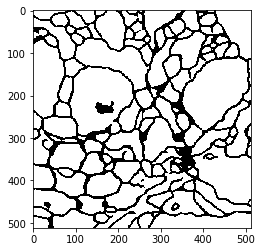

In [17]:
plt.imshow(y_pred.reshape(512, 512), cmap='gray');

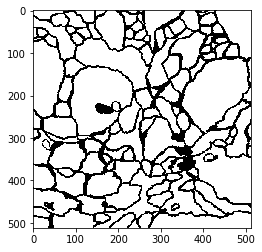

In [18]:
plt.imshow(target.numpy().reshape(512, 512), cmap='gray');

In [19]:
preds = trainer.predict_generator(isbi)

In [20]:
preds.shape

(30, 1, 512, 512)

In [21]:
preds[0]

array([[[0.9422114 , 0.9739217 , 0.97566175, ..., 0.9866894 ,
         0.9808672 , 0.95029336],
        [0.97357464, 0.98617715, 0.983955  , ..., 0.99237436,
         0.98980355, 0.97797376],
        [0.9801584 , 0.98977554, 0.98869634, ..., 0.9972115 ,
         0.99576926, 0.98718077],
        ...,
        [0.99216545, 0.9941294 , 0.99538225, ..., 0.9954235 ,
         0.99290484, 0.97986126],
        [0.98344165, 0.9873767 , 0.9916558 , ..., 0.9960161 ,
         0.99274445, 0.9793697 ],
        [0.9485897 , 0.9711031 , 0.9802705 , ..., 0.9919119 ,
         0.98593616, 0.94932795]]], dtype=float32)

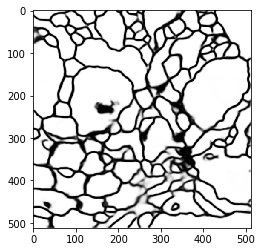

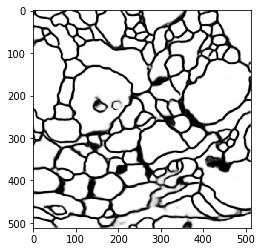

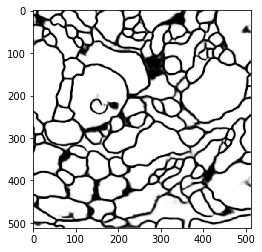

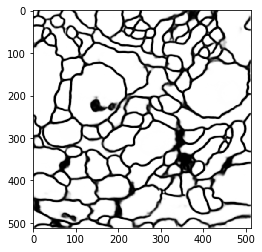

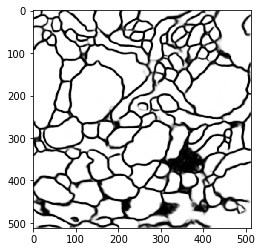

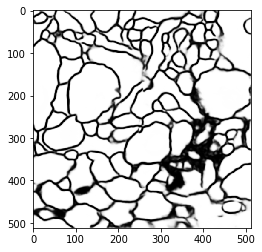

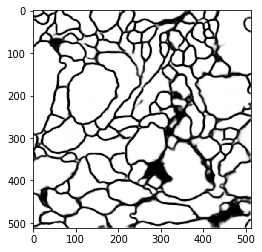

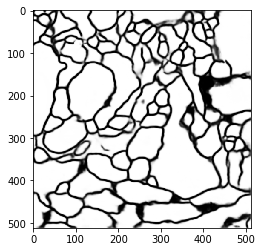

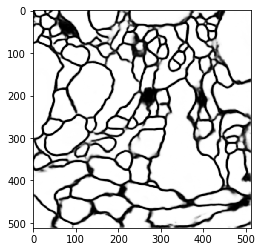

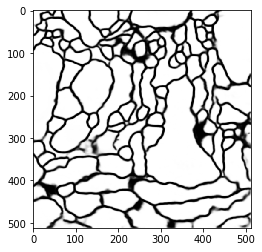

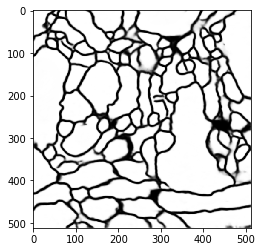

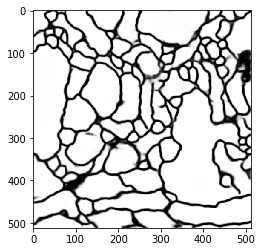

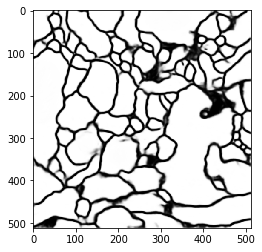

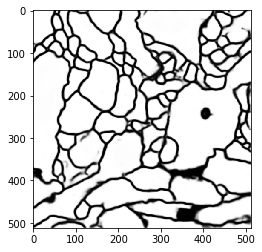

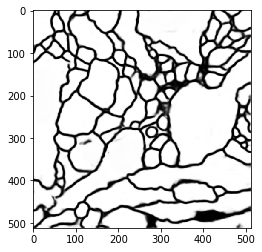

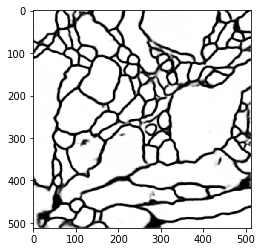

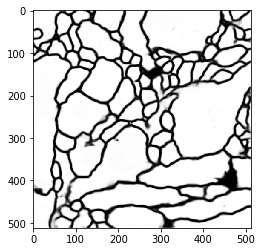

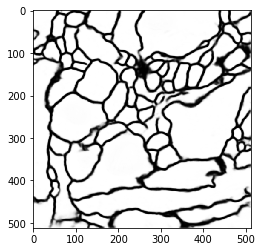

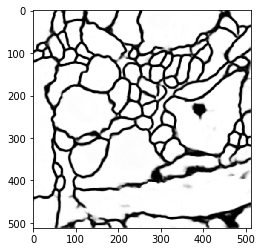

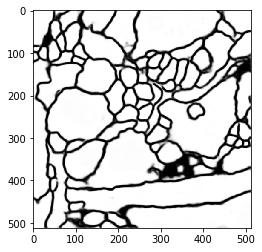

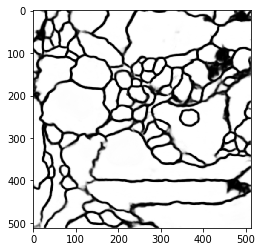

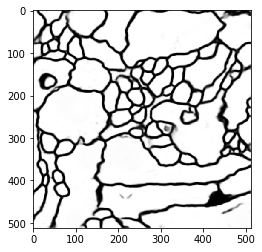

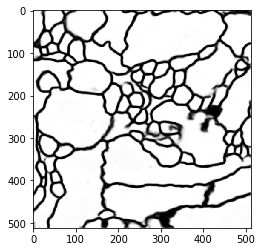

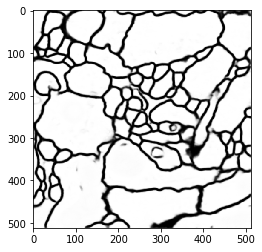

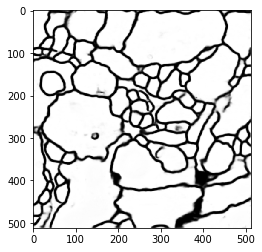

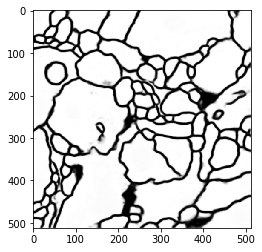

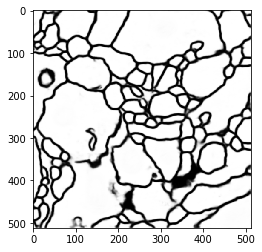

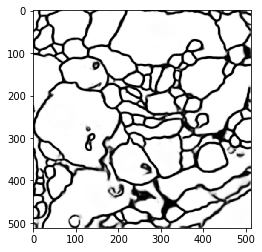

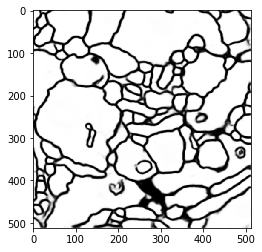

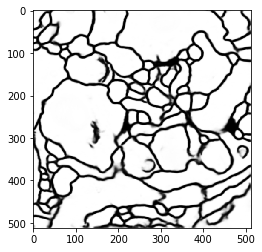

In [22]:
for y_pred in preds:
    plt.figure()
    plt.imshow(y_pred.reshape(512, 512), cmap='gray')

In [23]:
thresh = 0.5
for y_pred in preds:
    y_pred[y_pred >= thresh] = 1
    y_pred[y_pred < thresh] = 0

In [24]:
preds[0]

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]], dtype=float32)

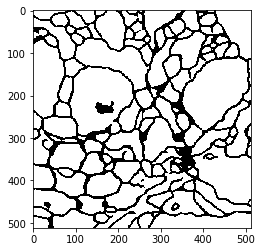

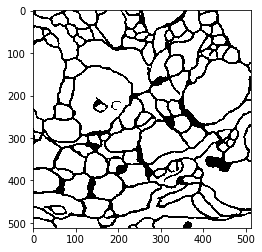

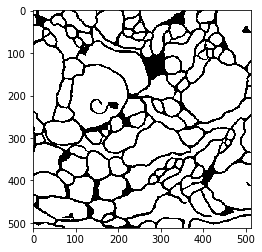

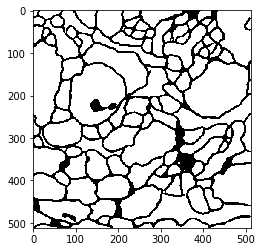

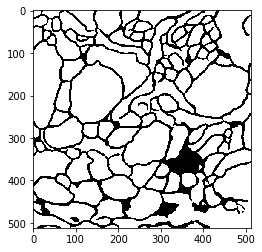

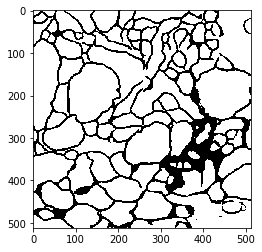

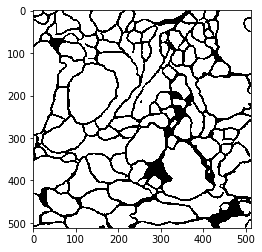

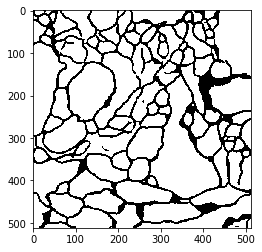

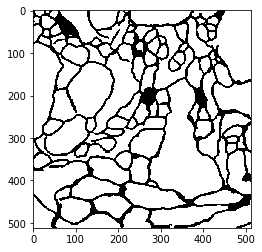

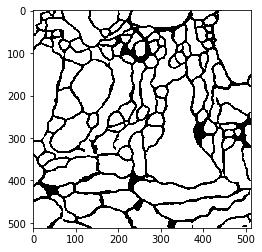

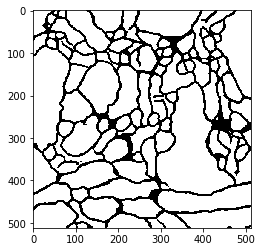

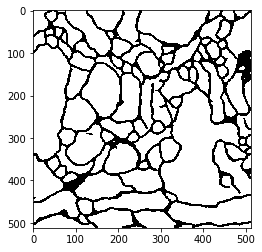

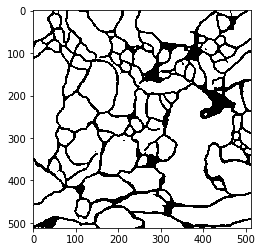

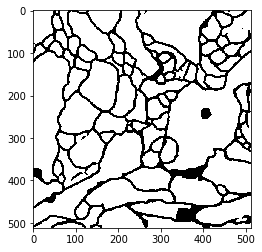

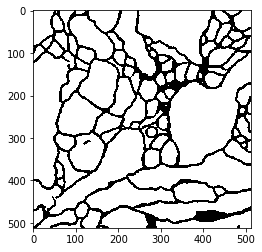

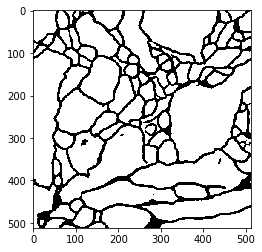

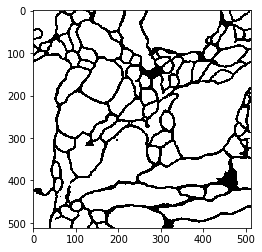

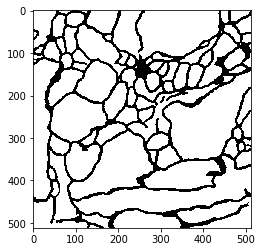

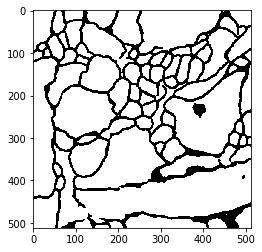

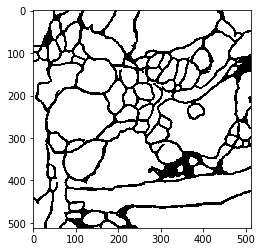

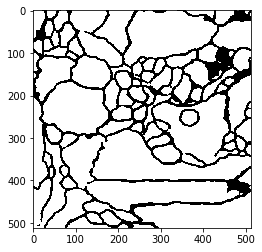

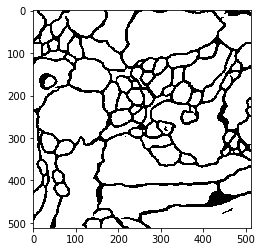

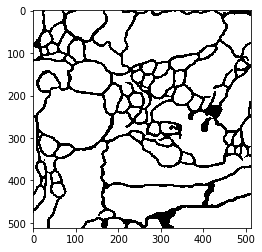

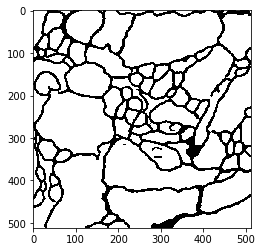

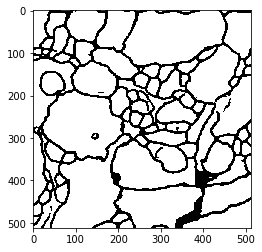

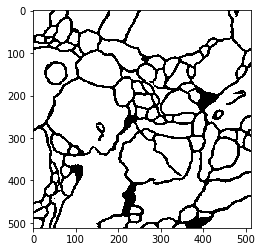

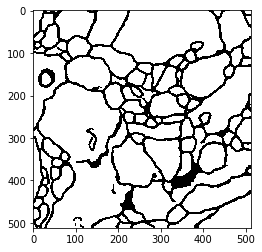

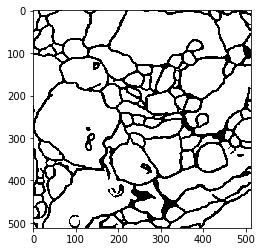

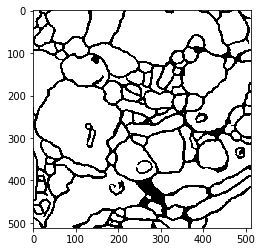

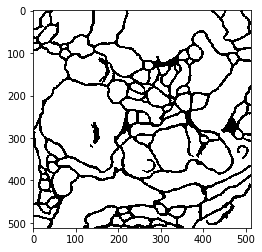

In [25]:
for y_pred in preds:
    plt.figure()
    plt.imshow(y_pred.reshape(512, 512), cmap='gray')